# Klappen der Bügelbauten des Berliner Hauptbahnhofs 

Im folgenden sollen die Seilkräfte während des Klappvorgangs der Bügelbauten des Berliner Hauptbahnhofs
berechnet werden. Der Rohbau wurde zunächst über Seilzüge angehoben bis der Schwerpunkt
über dem Drehpunkt lag und anschließend über weitere Seilzüge bis in die Endlage abgesenkt. Gegeben
ist die abgebildete Geometrie.

<center><img src="buegelbauten.PNG" alt="buegelbauten"></center>

1.  Bestimmen Sie die Lage des Schwerpunkts $S$. Dabei kann aufgrund der Verteilung der diagonalen Stützseile angenommen werden, dass die Höhe $h$ kleiner als $\frac{a}{2}$ ist. Der Wert für $h$ soll hier als Schätzung ($h = 19\text{ m}$) vorgegeben sein. Desweiteren ist bekannt, dass sich der Schwerpunkt bei einem Kippwinkel von $ \alpha_{GG}= 31^\circ$ direkt über dem Lager befindet. Es bleibt noch $l$ zu bestimmen.

2. Bestimmen Sie in Abhängigkeit des Kippwinkels $\alpha$ die Vektoren $\vec{AD}$, $\vec{AS}$, $\vec{DB}$ und $\vec{DC}$. Stellen Sie auch die im Schwerpunkt $S$ wirkende Gewichtskraft $\vec{G}$ als Vektor dar.

3. Bestimmen Sie die Seilkraft $F_{S_1}$ des Seils, welches den Bügelbau anhebt, für Kippwinkel $\alpha$ von $0^\circ$ bis $31^\circ$. Dabei soll nur dieses Seil Kräfte aufnehmen können.

4. Bestimmen Sie die Seilkraft $F_{S_2}$ des Seils, welches den Bügelbau absenkt, für Kippwinkel $\alpha$ von $31^\circ$ bis zur Endlage. Dabei soll nur dieses Seil Kräfte aufnehmen können.

5. Stellen Sie die Kraftverläufe von $F_{S_1}$ und $F_{S_2}$ grafisch dar.

6. Damit um die Gleichgewichtslage bei $\alpha_{GG} = 31^\circ$ ein sicheres Arbeiten gewährleistet wird, sind bei den Winkellagen $9^\circ \leq \alpha \leq 37^\circ$ beide Seile im Eingriff. Dabei soll die Seilkraft $|\vec{F}_{S_1}|$ linear von $|\vec{F}_{S_1}(\alpha= 9^\circ)|$ auf $| \vec{F}_{S_1}( \alpha= 37^\circ)| = 0$ abfallen. Berechnen Sie die Kraft im zweiten Seil.

7. Stellen Sie die Kraftverläufe $F_{S_1}$ und $F_{S_2}$ für den in 6.) dargestellten Fall grafisch dar.

8. Welche maximalen Kräfte $F_{S_1,\text{max}}$ und $F_{S_2,\text{max}}$ müssen durch die Seile gehalten werden? Treffen Sie auch eine Aussage darüber, ob die Auslegung der Stärke der Seile bzw. Zugbündel aus 4 mal 20 Seilen beim Heben und 8 mal 20 Seile beim Senken sinnvoll ist.

Geg.: $a = 43.5\text{ m}$, $b = 15 \text{ m}$, $c =  21.4 \text{ m}$, $h \approx 19 \text{ m}$, $m = 1250 \text{ t}$, $\alpha_{GG} = 31^\circ$

### Importieren der verwendeten Bibliotheken

In [1]:
### Bibliotheken importieren
import numpy as np
from sympy import *
from sympy.physics.mechanics import *
import matplotlib as mlp
import matplotlib.pyplot as plt
from IPython.display import Latex

### Line Magic
%matplotlib inline

# Koordinatensystem 
e = ReferenceFrame('e')
e.latex_vecs = [f'\\vec{{e}}_{var}' for var in ['x', 'y', 'z']]

# Symbolische Variablen
a, b, c, h, m, alpha_GG, g = symbols('a, b, c, h, m, alpha_GG, g')
params = {a: 43.5, b: 15, c: 21.4, h: 19, m: 1250*1000, alpha_GG: rad(31), g: 9.81}

### Lösung
#### 1. Ermittlung der Schwerpunktskoordinaten 

Skizze eines Bügels im Gleichgewichtszustand:
<center><img src="einzelbuegel.PNG" alt="einzelbuegel"></center>

Mit $\alpha_{GG} = 31^\circ$ und $h \approx 19 \text{ m}$ folgt das Ergebnis (in $\text{m}$) unmittelbar zu

In [2]:
l = h*tan(alpha_GG)
display(l)                 # symbolisch
display(N(l.subs(params))) # numerisch in m

h*tan(alpha_GG)

11.4163517615236

#### 2. Vektorielle Darstellung aller Größen

Skizze im gekippten Zustand:
<center><img src="buegel_gekippt.PNG" alt="buegel_gekippt"></center>

Mithilfe der Skizze lassen sich die Vektoren definieren:

In [3]:
alpha = symbols('alpha')
AD = c*(cos(alpha)*e.x + sin(alpha)*e.y)
AS = l*(cos(alpha)*e.x + sin(alpha)*e.y) + h*(-sin(alpha)*e.x + cos(alpha)*e.y)
DB = -AD + c*e.x
DC = DB + c*e.y
G = -m*g*e.y

DC

(-c*cos(alpha) + c)*e.x + (-c*sin(alpha) + c)*e.y

#### 3. Seilkraft $\vec{F}_{S_1}$

Freischnitt beim Anheben:
<center><img src="buegel_freischnitt_beim_anheben.PNG" alt="buegel_freischnitt_beim_anheben"></center>

Zunächst drücken wir den Vektor $\vec{F}_{S_1}$ über seinen noch unbekannte Betrag $F_{S_1}$ und seine Richtung $\frac{\vec{DC}}{|\vec{DC}|}$ aus:

In [4]:
F_S1 = symbols('F_S1') # Betrag 

F_S1_vec = F_S1 * DC/DC.magnitude()
F_S1_vec

F_S1*(-c*cos(alpha) + c)/sqrt((-c*sin(alpha) + c)**2 + (-c*cos(alpha) + c)**2)*e.x + F_S1*(-c*sin(alpha) + c)/sqrt((-c*sin(alpha) + c)**2 + (-c*cos(alpha) + c)**2)*e.y

Als nächstes werten wir eine Momentenbilanz um den Punkt $A$ aus:

In [5]:
M_A1 = AS.cross(G) + AD.cross(F_S1_vec)
M_A1

(F_S1*c*(-c*sin(alpha) + c)*cos(alpha)/sqrt((-c*sin(alpha) + c)**2 + (-c*cos(alpha) + c)**2) - F_S1*c*(-c*cos(alpha) + c)*sin(alpha)/sqrt((-c*sin(alpha) + c)**2 + (-c*cos(alpha) + c)**2) - g*m*(-h*sin(alpha) + h*cos(alpha)*tan(alpha_GG)))*e.z

Anschließend projizieren wir das Ergebnis mit `dot` (Skalarprodukt) auf $\vec{e}_z$ und lösen mit `solve` nach $F_{S_1}$ auf:

In [6]:
F_S1_sol = solve(M_A1.dot(e.z),F_S1)[0]
F_S1_sol

-sqrt(2)*g*h*m*sqrt(-c**2*(2*sqrt(2)*sin(alpha + pi/4) - 3))*(sin(alpha) - cos(alpha)*tan(alpha_GG))/(2*c**2*cos(alpha + pi/4))

#### 4. Seilkraft $\vec{F}_{S_2}$

Freischnitt beim Absenken:
<center><img src="buegel_freischnitt_beim_absenken.PNG" alt="buegel_freischnitt_beim_absenken"></center>

Das Vorgehen ist äquivalent zu Teilaufgabe 3:

In [7]:
F_S2 = symbols('F_S2') # betrag 

F_S2_vec = F_S2 * DB/DB.magnitude()
F_S2_vec

M_A2 = AS.cross(G) + AD.cross(F_S2_vec)
F_S2_sol = solve(M_A2.dot(e.z),F_S2)[0]
F_S2_sol

sqrt(2)*g*h*m*sqrt(c**2*(1 - cos(alpha)))*(1 - tan(alpha_GG)/tan(alpha))/c**2

#### 5. Verläufe der Seilkräfte in Abhängigkeit des Kippwinkels 
Für die grafische Darstellung der Seilkräfte $F_{S_1}, F_{S_2}$, konvertieren wir diese mit `lambdify` in Funktionen, sodass wir diese an Stellen ihres Definitionsbereiches auswerten können:

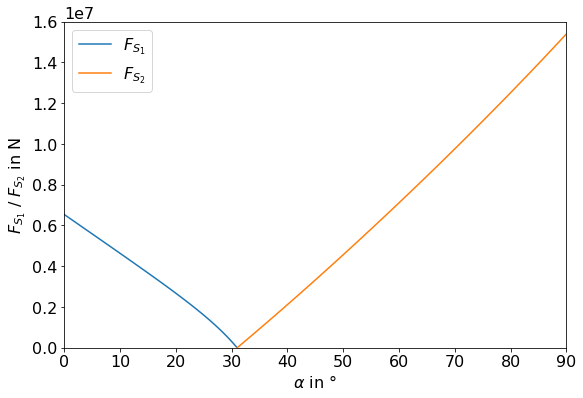

In [31]:
F_S1_fun = lambdify(alpha, F_S1_sol.subs(params))
F_S2_fun = lambdify(alpha, F_S2_sol.subs(params))

def bereich(start,ende,einheit='deg'):
    out = np.linspace(start,ende)
    if einheit == 'rad':
        out = np.radians(out)
    return out

# Plots
mlp.rc('font', size=16)
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
ax.plot(bereich(0,31),F_S1_fun(bereich(0,31,'rad')), label='$F_{S_1}$')
ax.plot(bereich(31,90),F_S2_fun(bereich(31,90,'rad')), label='$F_{S_2}$')
ax.set_xlabel('$\\alpha$ in \N{DEGREE SIGN}')
ax.set_ylabel('$F_{S_1}$ / $F_{S_2}$ in N')
ax.set_xlim([0,90])
ax.set_ylim([0, 1.6*10**7])
ax.legend()
plt.show()

#### 6. Seilkraft $\vec{F}_{S_2}$ in der Lage zwischen $9^\circ$ und $37^\circ$
Nun werden beide Kräfte im Freischnitt berücksichtigt:
<center><img src="buegel_freischnitt_beide_kraefte.PNG" alt="buegel_freichnitt_beide_kraefte"></center>

Eine erneute Momentenbilanz um $A$ liefert das gesuchte Ergebnis für $F_{S_2}$ in Abhängigkeit von $F_{S_1}$ und $\alpha$:

In [9]:
M_A3 = AS.cross(G) + AD.cross(F_S1_vec) + AD.cross(F_S2_vec)
F_S2_neu = solve(M_A3.dot(e.z),F_S2)[0]
F_S2_neu

sqrt(c**2*(2 - 2*cos(alpha)))*(-F_S1*sqrt(c**2*(-2*sqrt(2)*sin(alpha + pi/4) + 3))*sin(alpha) + F_S1*sqrt(c**2*(-2*sqrt(2)*sin(alpha + pi/4) + 3))*cos(alpha) + g*h*m*(-2*sqrt(2)*sin(alpha + pi/4) + 3)*sin(alpha) - g*h*m*(-2*sqrt(2)*sin(alpha + pi/4) + 3)*cos(alpha)*tan(alpha_GG))/(c**2*(-2*sqrt(2)*sin(alpha + pi/4) + 3)*sin(alpha))

Wir konstruieren noch $F_{S_1}$ wie gefordert als linear abfallend zwischen $9^\circ$ und $37^\circ$ unter Zuhilfenahme der Zweipunkteform einer Geraden:

In [10]:
F_S1_9 = F_S1_sol.subs(params).subs(alpha,rad(9)) # F_S1 für alpha=9°
F_S1_37 = 0                                       # F_S1 für alpha=37° 

F_S1_lin = (F_S1_37 - F_S1_9) / (rad(37) - rad(9)) * (alpha - rad(9)) + F_S1_9 # Zweipunkteform
N(F_S1_lin)

6381220.56809312 - 9881540.72145431*alpha

#### 7. Verlauf der Seilkräfte in Abhängigkeit des Kippwinkels 

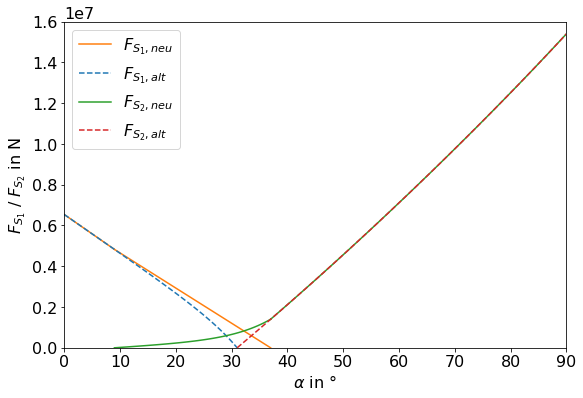

In [37]:
F_S1_fun2 = lambdify(alpha, F_S1_lin.subs(params))
params[F_S1] = F_S1_lin
F_S2_fun2 = lambdify(alpha, F_S2_neu.subs(params))

# Plots
mlp.rc('font', size=16)
fig, ax = plt.subplots()
fig.set_size_inches(9,6)

blau = '#1f77b4'
orange = '#ff7f0e'
gruen = '#2ca02c'
rot = '#d62728'

ax.plot(bereich(0,9),F_S1_fun(bereich(0,9,'rad')), label='$F_{S_1,neu}$', color=orange)
ax.plot(bereich(9,37),F_S1_fun2(bereich(9,37,'rad')), color=orange)
ax.plot(bereich(0,31), F_S1_fun(bereich(0,31,'rad')), label='$F_{S_1,alt}$', linestyle='--', color=blau)

ax.plot(bereich(9,37),F_S2_fun2(bereich(9,37,'rad')), color = gruen, label='$F_{S_2,neu}$')
ax.plot(bereich(37,90),F_S2_fun(bereich(37,90,'rad')), color=gruen)
ax.plot(bereich(31,90), F_S2_fun(bereich(31,90,'rad')), label='$F_{S_2,alt}$', color=rot, linestyle='--')
ax.set_xlabel('$\\alpha$ in \N{DEGREE SIGN}')
ax.set_ylabel('$F_{S_1}$ / $F_{S_2}$ in N')
ax.set_xlim([0,90])
ax.set_ylim([0, 1.6*10**7])
ax.legend()
plt.show()

#### 8. maximale Seilkräfte
Das Maximum von ${F_{S_1}}$ tritt bei $0^\circ$, das von $F_{S_2}$ bei $90^\circ$ auf.

In [12]:
F_S1_max = F_S1_fun(0)
F_S2_max = F_S2_fun(90*np.pi/180)
print(f"Die maximale Kraft im ersten Seil beträgt {F_S1_max:.2E} N.")
print(f"Die maximale Kraft im zweiten Seil beträgt {F_S2_max:.2E} N.")

Die maximale Kraft im ersten Seil beträgt 6.54E+06 N.
Die maximale Kraft im zweiten Seil beträgt 1.54E+07 N.
